# Реализация алгоритмов кластеризации

### Импортируем необходимые библиотеки

In [4]:
import random
import math

import numpy as np

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from matplotlib import pyplot as plt
import matplotlib.cm as cm

Функция отрисовки графика

In [71]:
def pltShow(X, y, name):
    plt.figure(figsize = (11, 6))
    plt.scatter(X[:, 0], X[:, 1], c = y)
    plt.title(name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

### Генерация данных для кластеризации с 5 предполагаемыми кластерами

TypeError: 'str' object is not callable

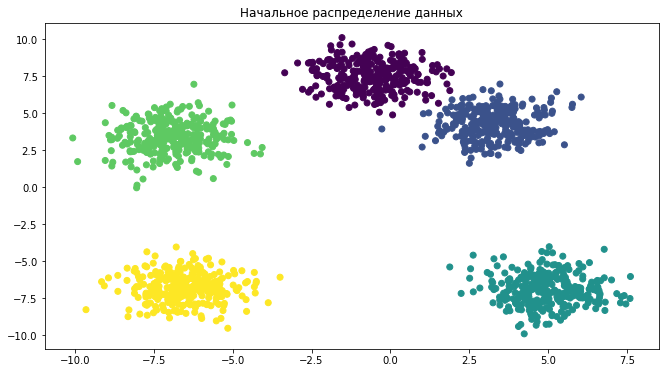

In [73]:
n_samples = 1500
random_state = 1

data, initClusters = make_blobs(n_samples=n_samples, centers=5, n_features=2)

pltShow(data, initClusters, "Начальное распределение данных")

## Выбор оптимального количества кластеров

Параметры разделения выборки на кластеры определяются с помощью Метрики Силуэт. 
Метрика показывает, насколько среднее расстояние до объектов своего
кластера отличается от среднего расстояния до объектов других кластеров. 
Данная величина лежит в диапазоне [−1,1]: значения, близкие к единице соответствуют лучшему разделению на кластеры

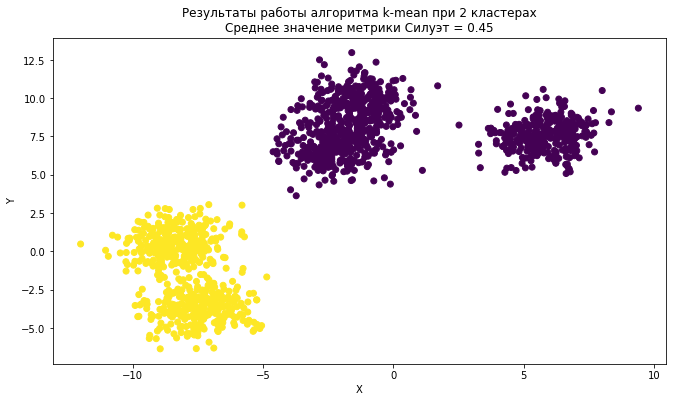

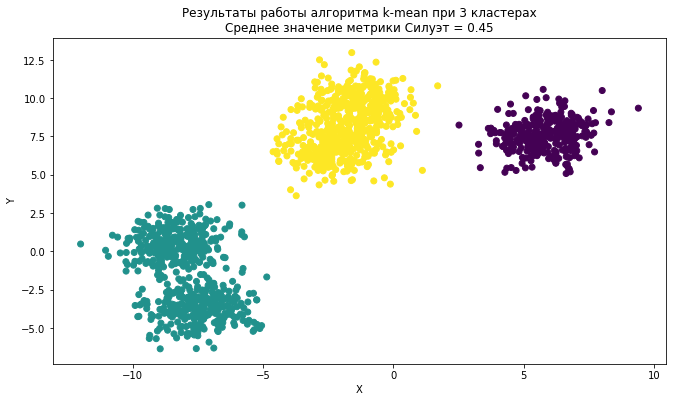

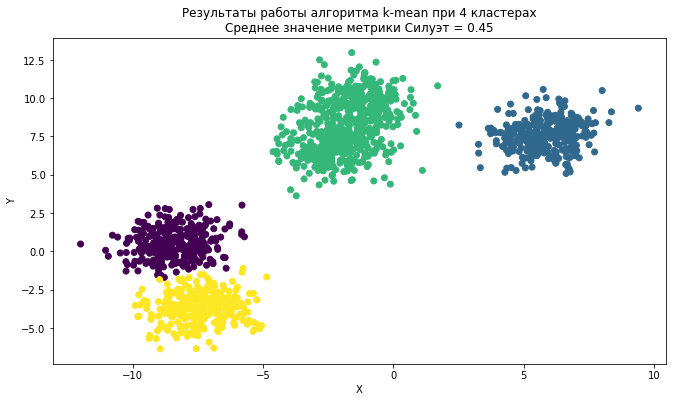

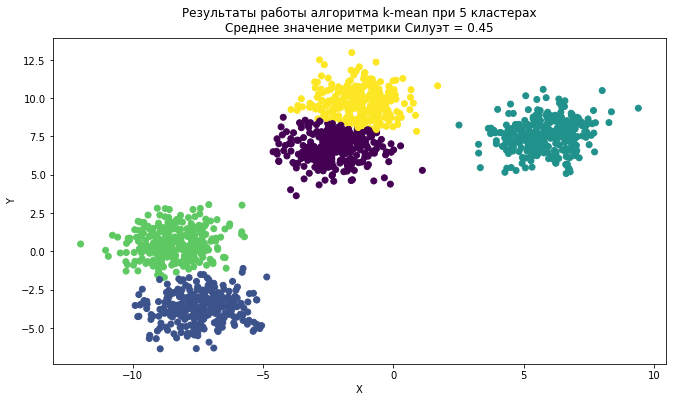

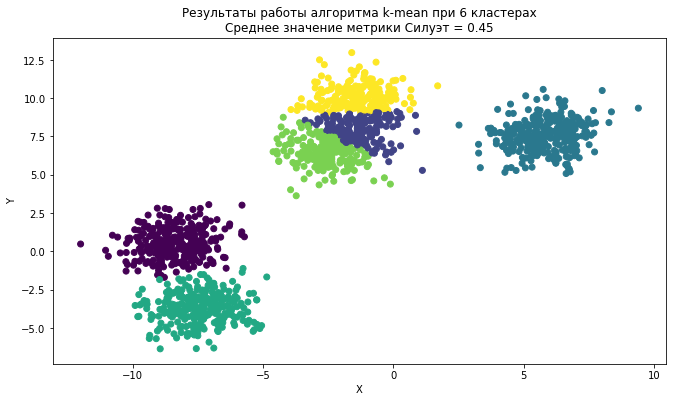

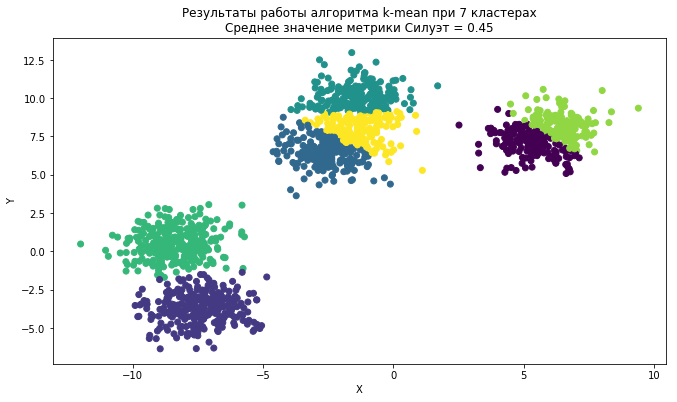

In [60]:
k_meanModels = []

minClustersCount = 2
maxClustersCount = 8

nClustersAndSilhouetteDict = {}

for k in range(minClustersCount, maxClustersCount):
    kmeanModel = KMeans(n_clusters=k , random_state=random_state)
    clusterLabels = kmeanModel.fit_predict(data)
    
    silhouetteAvg = round(silhouette_score(data, clusterLabels), 2)
    
    nClustersAndSilhouetteDict[silhouetteAvg] = k
    text = "Результаты работы алгоритма k-mean при " + str(k) + " кластерах" + '\n' + "Среднее значение метрики Силуэт = " + str(silhouette_avg)
    pltShow(data, clusterLabels, text)
    

In [61]:
optSilhouette = max(nClustersAndSilhouetteDict.keys())
nClustersOpt = nClustersAndSilhouetteDict[optSilhouette]

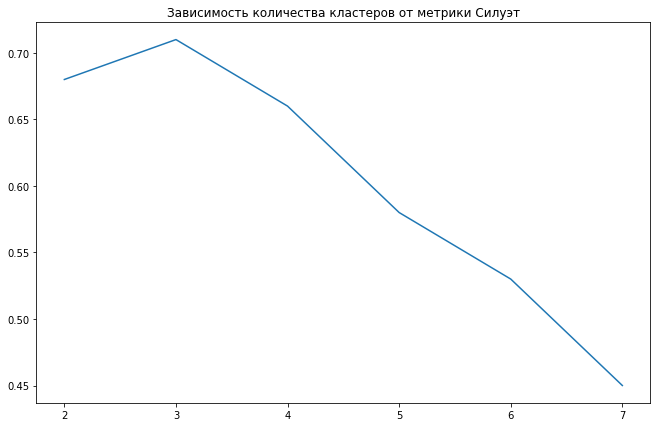

In [64]:
plt.figure(figsize = (11,6))
plt.plot(nClustersAndSilhouetteDict.values(), nClustersAndSilhouetteDict.keys())
plt.title('Зависимость количества кластеров от метрики Силуэт')
plt.xlabel=  "количество кластеров"
plt.ylabel =  "Значение метрики Силуэт"
plt.show()

TypeError: 'str' object is not callable

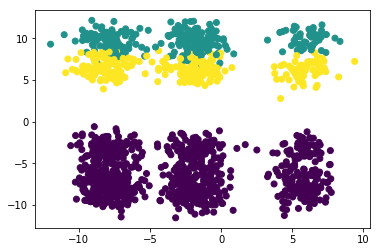

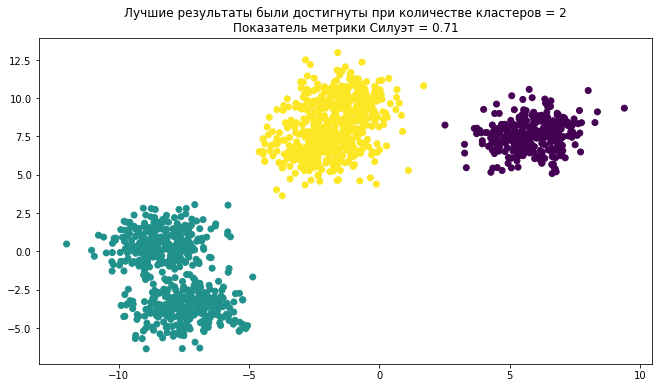

In [66]:
bestModel = KMeans(n_clusters=nClustersOpt , random_state=random_state)
plt.scatter(data[:, 0], X[:, 1], c=bestModel.fit_predict(X), )
title = "Лучшие результаты были достигнуты при количестве кластеров = " + str(optimal_n_clusters) + '\n' + "Показатель метрики Силуэт = " + str(optSilhouette)
pltShow(data, bestModel.fit_predict(data), title)

In [ ]:
n_samples = 1500
X,y = datasets.make_blobs(n_samples, n_features=2, centers=8)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Сгенерированные данные")
plt.xlabel("X");
plt.ylabel("Y")
plt.show()

silhouette = []; num = [15,14,13,12,11,10,9,8,7,6,5,4,3,2]; maxSilhouette = 0; best_n_clusters = 0
for k in range(15, 1, -1):
    clustering = AgglomerativeClustering(n_clusters=k).fit(X)
    labels = clustering.labels_
    #
    y_pred = clustering.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xlabel("X"); plt.ylabel("Y")
    plt.title("Разделение на " + str(k) + " кластеров ")
    plt.show()
    #
    silhouette_avg = silhouette_score(X, labels)
    silhouette.append(silhouette_avg)
    if silhouette_avg > maxSilhouette:
        maxSilhouette = silhouette_avg
        best_n_clusters = k

table = PrettyTable()
table.add_row(num)
table.add_row(silhouette)
print("Таблица зависимости метрики силуэт от количества кластеров")
print(table)

plt.clf()
plt.title("График изменения метрики Силуэт")
plt.xlabel("Количество кластеров"); plt.ylabel("Silhouette")
plt.plot(num, silhouette)
plt.show()

best_model = AgglomerativeClustering(n_clusters=best_n_clusters).fit(X)
y = best_model.fit_predict(X)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X"); plt.ylabel("Y")
plt.title("Лучшие результаты, полученные при агломеративном алгоритме," + '\n' + "достигнуты при k = " + str(best_n_clusters)
          + '\n' + "Показатель метрики силуэт = " + str(maxSilhouette) )
plt.show()